In [4]:
#Importing the basic librarires
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# Bi-LSTM:

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [5]:
#Importing the dataset

data = pd.read_csv('../input/walmart-dataset/Walmart.csv')

#df.drop(['car name'], axis=1, inplace=True)
display(data.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(data.shape[1], data.shape[0]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



Inference: The Datset consists of 8 features & 6435 samples.


In [6]:
# some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# change float format in data
pd.options.display.float_format = '{:,.0f}'.format

In [8]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


In [9]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,"713,174",0,65,4,192,9
6431,45,05-10-2012,"733,455",0,65,4,192,9
6432,45,12-10-2012,"734,464",0,54,4,192,9
6433,45,19-10-2012,"718,126",0,56,4,192,9
6434,45,26-10-2012,"760,281",0,59,4,192,9


<Axes: >

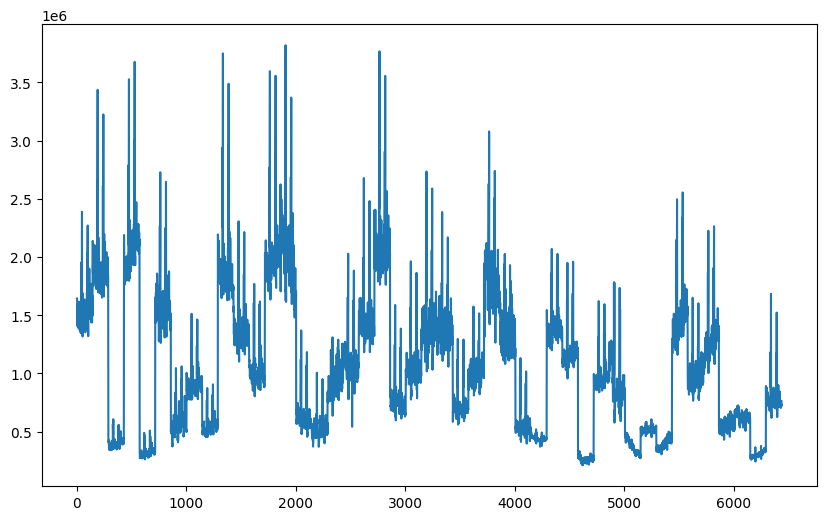

In [10]:
data['Weekly_Sales'].plot()

In [11]:
# data['Weekly_Sales'].plot(kind='kde')

In [12]:
# result = adfuller(data['Weekly_Sales'])
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])

# DATA PREPERATION

# 1. Rename Columns

In [13]:
# rename columns
data.columns  = data.columns.str.lower()
data.rename({'holiday_flag': 'is_holiday'}, axis = 1, inplace = True)
data.columns

Index(['store', 'date', 'weekly_sales', 'is_holiday', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

# 2. Missing Values

In [14]:
# cheak missing values
data.isnull().sum()

store           0
date            0
weekly_sales    0
is_holiday      0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

# 3. Duplicate Values

In [15]:
# Check Duplicate Values
data.duplicated().sum()

0

# 4. Feature Engineering

In [16]:
def get_season(quarter):

    '''this function is to get season according to quarter column'''

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [17]:
# correct data format of the 'date' column
data['date'] = pd.to_datetime(data['date'], format = "%d-%m-%Y")

# Create a new column "year" containing the year
data['year'] = data['date'].dt.year

# Create a new column "quarter" containing the season number
data['quarter'] = data['date'].dt.quarter

# Create a new column "season" containing the season
data['season'] = data['quarter'].apply(get_season)

# Create a new column "month" containing the month number
data['month'] = data['date'].dt.month

# Create a new column "month_name" containing the month names
data['month_name'] = data['date'].dt.month_name()

# Create a new column "week" containing the week number
data['week'] = data['date'].dt.isocalendar().week

# Create a new column "day_of_week" containing the day names
data['day_of_week'] = data['date'].dt.day_name()

In [18]:
# display a data sample
data.head(5)

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,March,9,Friday


In [19]:
data['week'] = data['week'].astype('int32')

# Exploratory Data Analysis (EDA)

* Univariate Analysis
* Bi-variate Analysis
* Time Series Analysis

In [20]:
data[['weekly_sales', 'temperature', 'fuel_price', 'unemployment', 'cpi']].describe()

,weekly_sales,temperature,fuel_price,unemployment,cpi
count,"6,435","6,435","6,435","6,435","6,435"
mean,"1,046,965",61,3,8,172
std,"564,367",18,0,2,39
min,"209,986",-2,2,4,126
25%,"553,350",47,3,7,132
50%,"960,746",63,3,8,183
75%,"1,420,159",75,4,9,213
max,"3,818,686",100,4,14,227


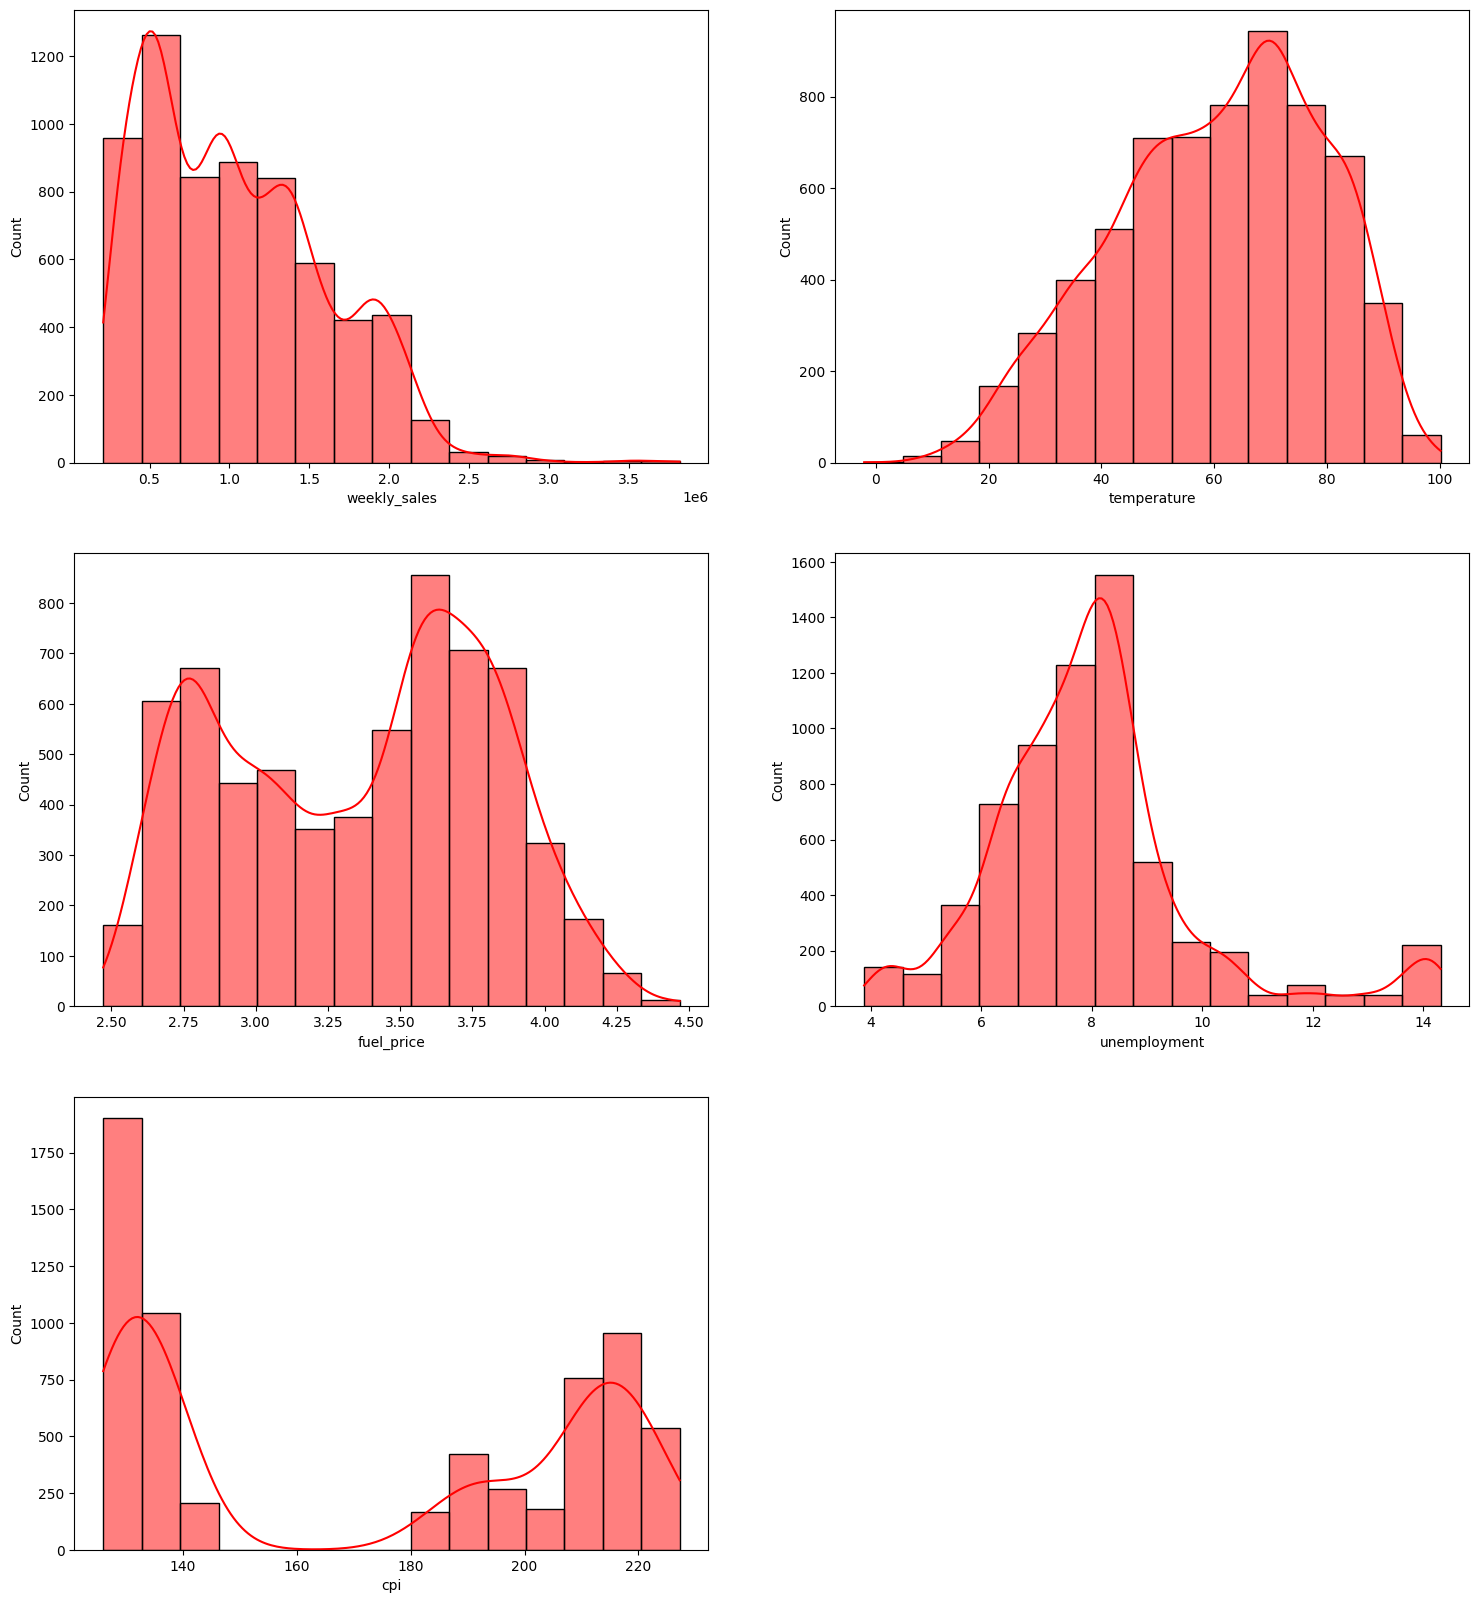

In [21]:
columns = ['weekly_sales', 'temperature', 'fuel_price', 'unemployment', 'cpi']
plt.figure(figsize=(18, 20))
for i,col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = data, x = col, kde = True, bins = 15, color = 'r')
plt.show()

Conclusion:

* The distribution of Weekly_Sales is right skewed, this is normal because the weekly sales may be high in some time.
* Temperature and Unemployment have normal distribution.
* CPI and Fuel_Price have bimodal distribution.

Categorical Features

* is_holiday
* year
* season
* month_name
* day_of_week

In [22]:
d = data['is_holiday'].value_counts()
d

is_holiday
0    5985
1     450
Name: count, dtype: int64

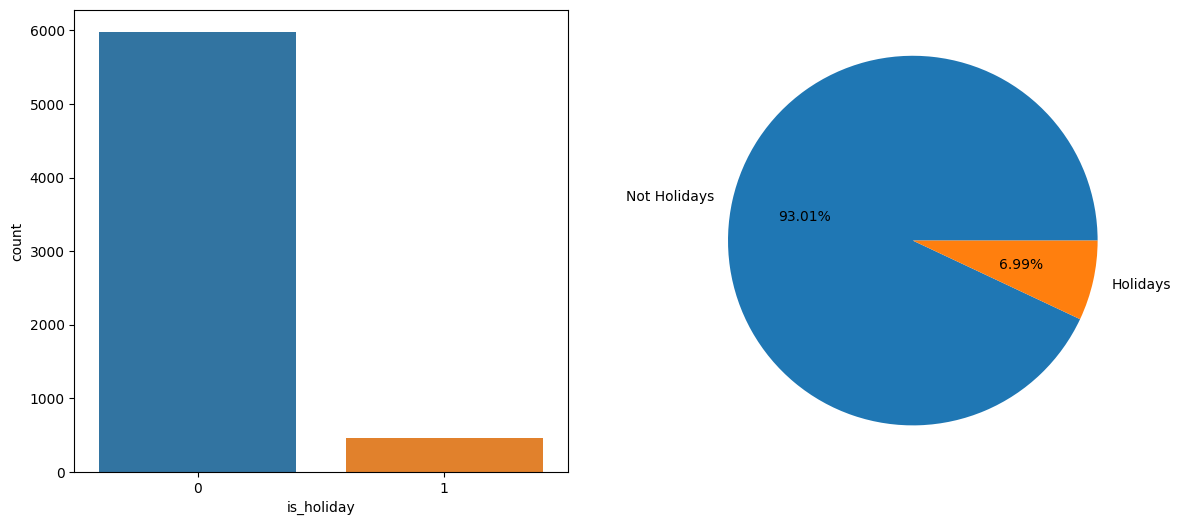

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = data, x = 'is_holiday', ax = ax[0])

ax[1].pie(data['is_holiday'].value_counts().values,
          labels = ['Not Holidays', 'Holidays'],
          autopct = '%1.2f%%')

plt.show()

Conclusion:

Days of no holiday are the most frequent than days of holiday in the dataset with a percentage of 93 % and this is normal.

In [24]:
data['year'].value_counts()

year
2011    2340
2010    2160
2012    1935
Name: count, dtype: int64

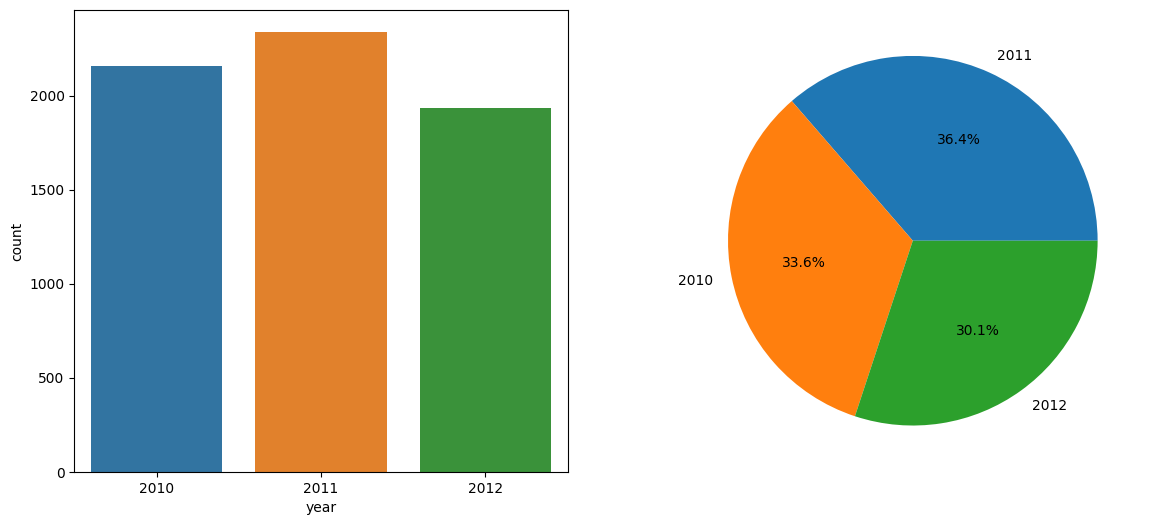

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = data, x = 'year', ax = ax[0])
ax[1].pie(data['year'].value_counts().values,
          labels = data['year'].value_counts().index,
          autopct = '%1.1f%%')
plt.show()

Conclusion:

2011 is the most frequent in the dataset because most of the weekly sales were recorded during this year.

In [26]:
data['season'].value_counts()

season
Summer    1800
Spring    1755
Winter    1485
Autumn    1395
Name: count, dtype: int64

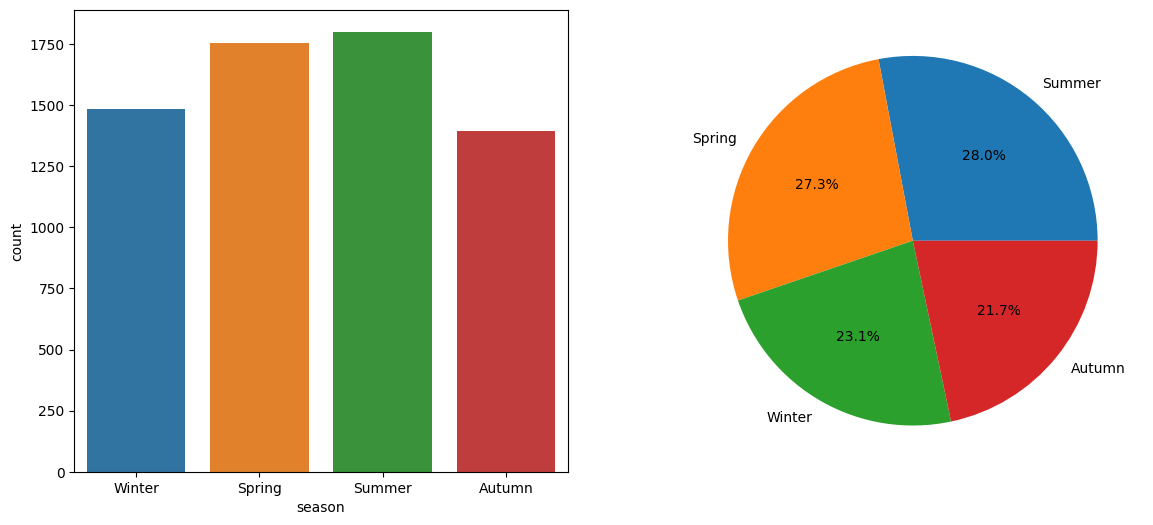

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = data, x = 'season', ax = ax[0])
ax[1].pie(data['season'].value_counts().values,
          labels = data['season'].value_counts().index,
          autopct = '%1.1f%%')
plt.show()

Conclusion:

Summer is the most frequent in the dataset because most of the weekly sales were recorded during this season.

In [28]:
data['month_name'].value_counts()

month_name
April        630
July         630
June         585
March        585
October      585
September    585
August       585
February     540
May          540
December     450
November     360
January      360
Name: count, dtype: int64

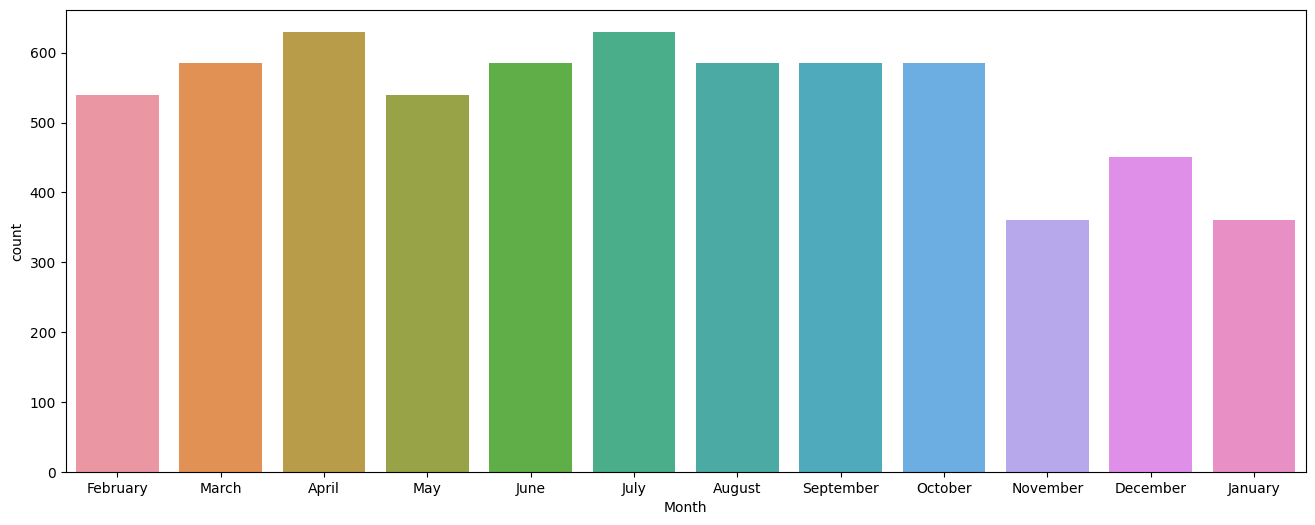

In [29]:
plt.figure(figsize=(16, 6))
sns.countplot(data = data, x = 'month_name')
plt.xlabel('Month')
plt.show()

Conclusion:

April and July are the most frequent in the dataset because most of the weekly sales were recorded in these months.

In [30]:
data['day_of_week'].value_counts()

day_of_week
Friday    6435
Name: count, dtype: int64

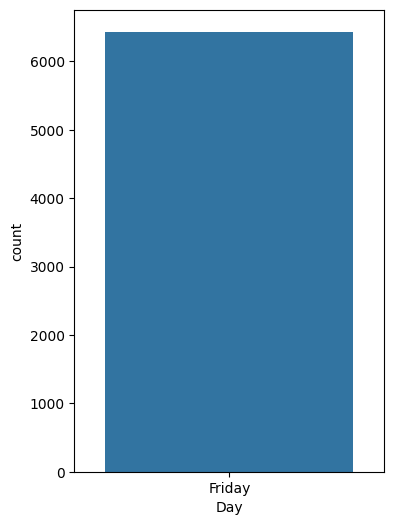

In [31]:
plt.figure(figsize=(4, 6))
sns.countplot(data = data, x = 'day_of_week')
plt.xlabel('Day')
plt.show()

Conclusion:

Friday is frequented in each row.

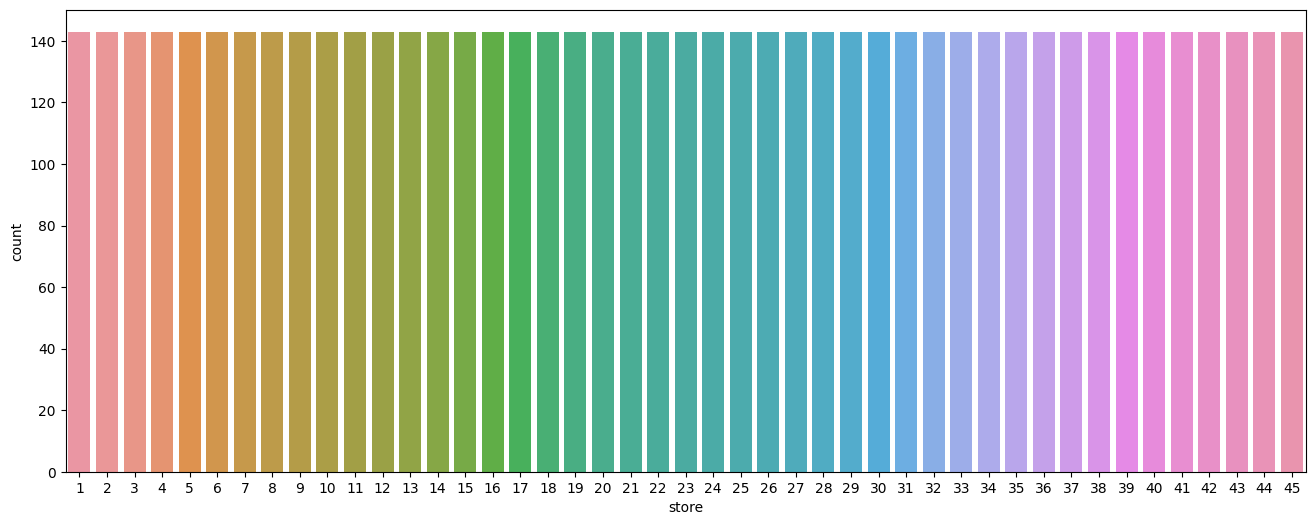

In [32]:
plt.figure(figsize=(16, 6))
sns.countplot(data = data, x = 'store')
plt.show()

Conclusion:

All stores are frequent with the same count in the dataset.

# Bi-variate Analysis
1. weekly_sales & is_holiday

    Q1: What are the average sales on holidays and regular days?

In [33]:
data.groupby('is_holiday')['weekly_sales'].mean()

is_holiday
0   1,041,256
1   1,122,888
Name: weekly_sales, dtype: float64

# LEWATIN DULU PERTANYAAN-PERTANYAAN EKONOMINYA

# DATA PREPOSESSING

In [34]:
data_copy = data.copy()

In [35]:
data_copy.drop(['date', 'year', 'quarter', 'month', 'day_of_week'], axis = 1, inplace = True)

In [36]:
# Check the data types
data_copy.dtypes

store             int64
weekly_sales    float64
is_holiday        int64
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
season           object
month_name       object
week              int32
dtype: object

In [37]:
# let's handle store and holiday columns as categorical features, so we should convert them into categories (objects).bb
# data_copy['date'] = data_copy['date'].astype('object')
data_copy['store'] = data_copy['store'].astype('object')
data_copy['is_holiday'] = data_copy['is_holiday'].astype('object')
data_copy['week'] = data_copy['week'].astype('object')

In [38]:
# Check the data types after convert
data_copy.dtypes

store            object
weekly_sales    float64
is_holiday       object
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
season           object
month_name       object
week             object
dtype: object

0 fuel_price
1 temperature
2 cpi
3 unemployment


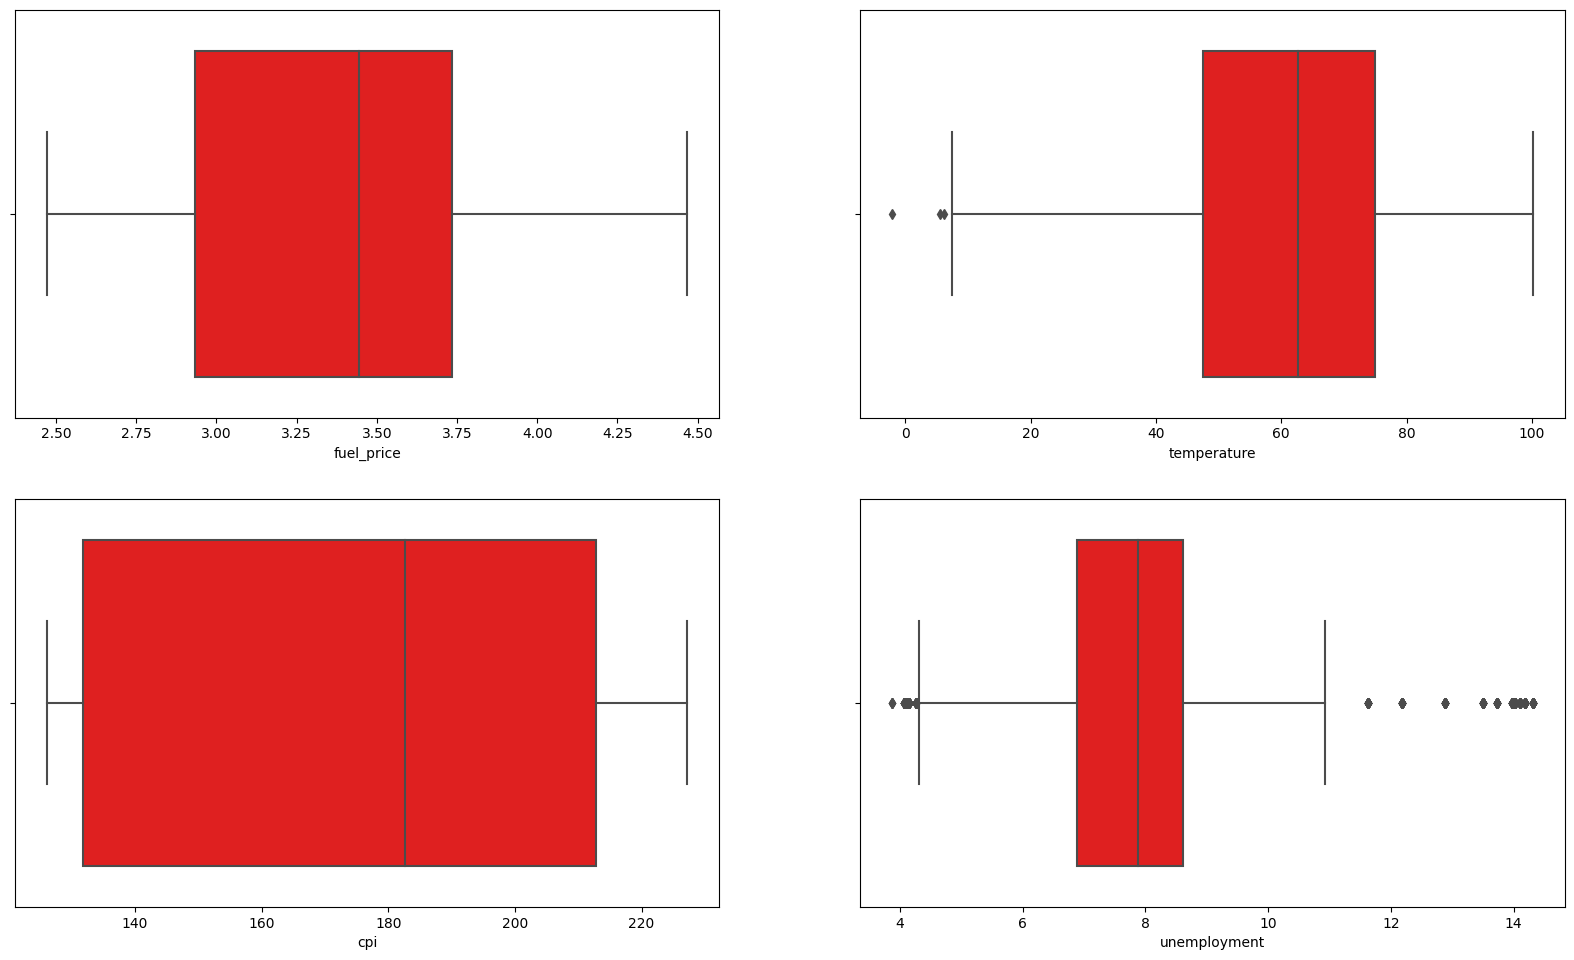

Number of data rows:  6435


In [39]:
cols = ['fuel_price', 'temperature', 'cpi', 'unemployment']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_copy, x = col, color = 'red')
plt.show()

print('Number of data rows: ', data_copy.shape[0])

In [40]:
# Remove outliers from the temperature column
data_copy.drop(data_copy[data_copy['temperature'] < 7].index, axis = 0, inplace = True)

In [41]:
# Remove outliers from the unemployment column
data_copy.drop(data_copy[data_copy['unemployment'] < 4.4].index, axis = 0, inplace = True)
data_copy.drop(data_copy[data_copy['unemployment'] > 11].index, axis = 0, inplace = True)

0 temperature
1 fuel_price
2 cpi
3 unemployment


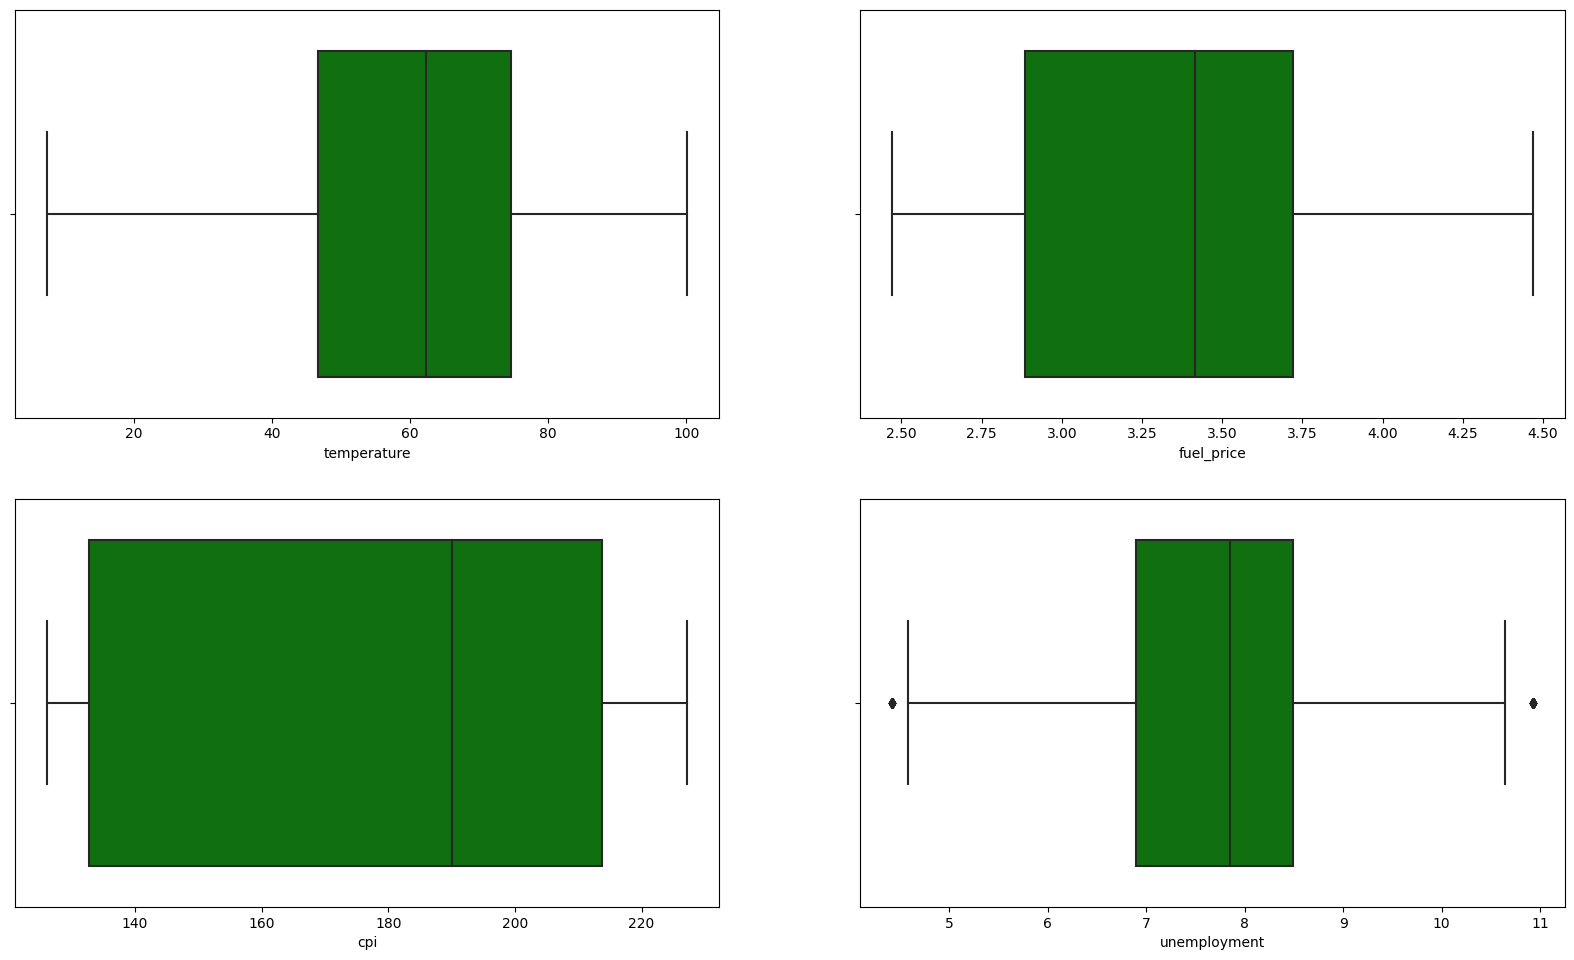

Number of data rows:  5938


In [42]:
cols = ['temperature', 'fuel_price', 'cpi', 'unemployment']
plt.figure(figsize=(20,18))
for i, col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_copy, x = col, color = 'g')
plt.show()

print('Number of data rows: ', data_copy.shape[0])

# Data Stationary

In [43]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_copy['weekly_sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("Data bersifat stasioner")
else:
    print("Data tidak stasioner")


ADF Statistic: -4.6127430304336645
p-value: 0.00012236124082146734
Data bersifat stasioner


<Figure size 1000x600 with 0 Axes>

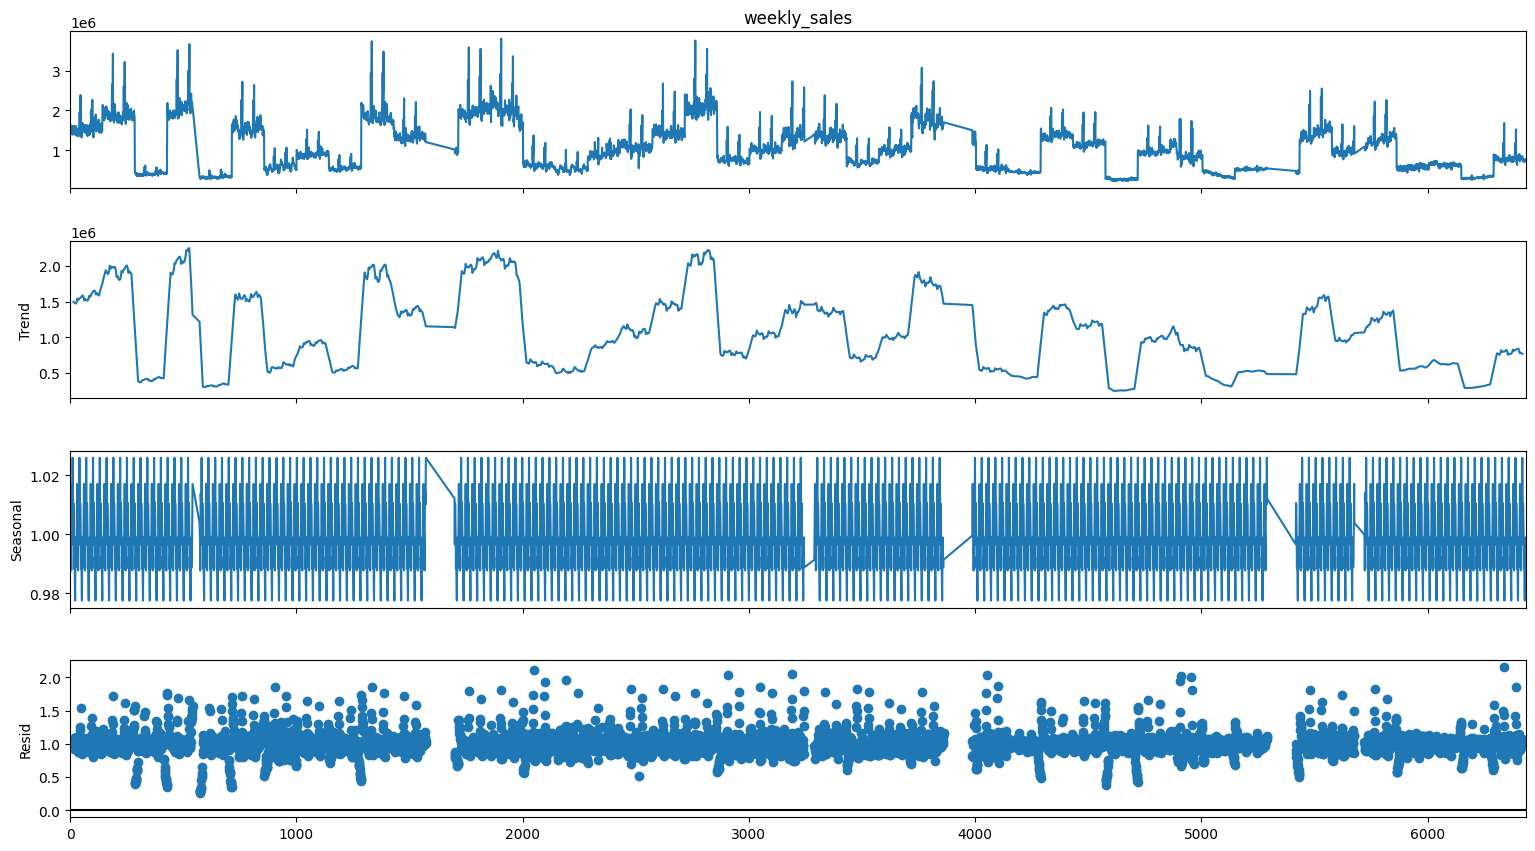

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_copy['weekly_sales'], model='multiplicative', period = 30) #nampilin pola selama 30 hari
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

# STANDARISASI

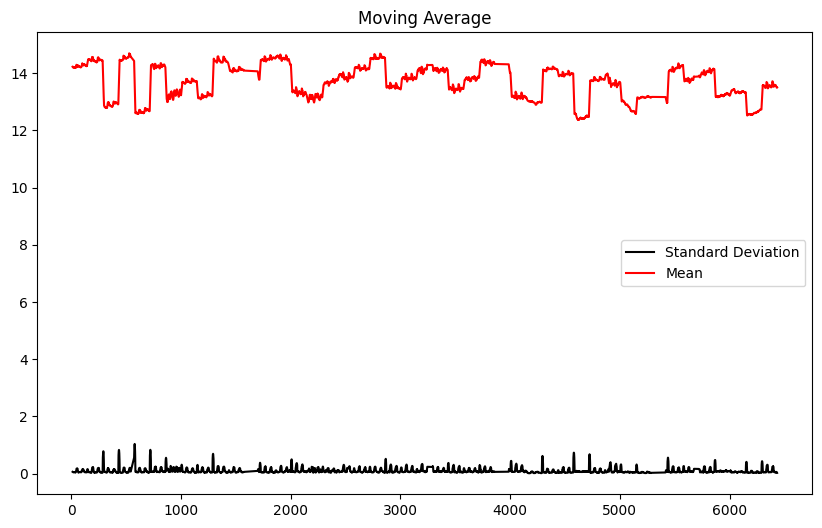

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data_copy['weekly_sales'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [46]:
data_copy.dropna(inplace=True)

In [47]:
df_forecast = data_copy['weekly_sales']
start = pd.to_datetime('2010-02-05')
end = pd.to_datetime('2012-11-01')
# pollution = df_forecast[start:end]

In [48]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Data preparation: Memisahkan fitur numerik dan target
numerical_features = ['temperature', 'fuel_price', 'cpi', 'unemployment']  # Contoh fitur numerik
target_column = 'weekly_sales'  # Contoh target

# Pisahkan fitur dan target
X = data_copy[numerical_features]
y = data_copy[target_column]

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi hasil kembali ke DataFrame (opsional)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

# Print hasil standarisasi
print("Sebelum Standarisasi:")
print(X.head())

print("\nSetelah Standarisasi:")
print(X_scaled_df.head())

Sebelum Standarisasi:
   temperature  fuel_price  cpi  unemployment
0           42           3  211             8
1           39           3  211             8
2           40           3  211             8
3           47           3  211             8
4           46           3  211             8

Setelah Standarisasi:
   temperature  fuel_price  cpi  unemployment
0           -1          -2    1             0
1           -1          -2    1             0
2           -1          -2    1             0
3           -1          -2    1             0
4           -1          -2    1             0


In [49]:
# # scaler = StandardScaler()
# scaler = MinMaxScaler()
# df_forecast = pd.DataFrame(scaler.fit_transform(df_forecast.values.reshape(-1, 1)))

In [50]:
# train_size = int(len(df_forecast) * 0.9)
# train = df_forecast.iloc[:train_size]
# test = df_forecast.iloc[train_size:]

In [51]:
# train.head()

In [52]:
# test.head()

# Splitting Data Training and Testing

In [53]:
X = data_copy.drop('weekly_sales', axis = 1)
y = data_copy['weekly_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [54]:
print('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5938, 9)
Shape of train data:  (5047, 9)
Shape of test data :  (891, 9)


# DATA TRANSFORMATION

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder

# Splitting the data into Numerical Features and Categorical Features
num_features = data_copy.select_dtypes('number').columns.to_list()
num_features.remove('weekly_sales') #target

cat_features = data_copy.select_dtypes('object').columns.to_list()

print(f'Numerical Features : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features : ['temperature', 'fuel_price', 'cpi', 'unemployment']
Categorical Features: ['store', 'is_holiday', 'season', 'month_name', 'week']


In [56]:
# Data transformation pipeline
preprocessor = ColumnTransformer([
    ('num_features', StandardScaler(), num_features),  # Normalisasi data numerik
    ('cat_features', BinaryEncoder(), cat_features)    # Encoding data kategorikal
])


# Fitting the training data
preprocessor.fit(X_train)

# Simpan scaler numerik
scaler_object = preprocessor.named_transformers_['num_features']

In [57]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [58]:
# Pastikan data dalam format array untuk LSTM
X_train = np.array(X_train_transformed)
X_test = np.array(X_test_transformed)

# Untuk LSTM, data perlu dalam bentuk 3D: (samples, timesteps, features)
# Di sini kita asumsikan setiap sampel hanya memiliki 1 timestep
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print(f"Shape of X_train for Bi-LSTM: {X_train.shape}")
print(f"Shape of X_test for Bi-LSTM: {X_test.shape}")

Shape of X_train for Bi-LSTM: (5047, 1, 25)
Shape of X_test for Bi-LSTM: (891, 1, 25)


In [59]:
#Default 1
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def scale_data(train_set, test_set):
    """
    Scales data using MinMaxScaler dan memisahkan data menjadi X_train, y_train, X_test, dan y_test.
    """
    # Konversi DataFrame ke numpy array
    train_set = train_set.to_numpy() if isinstance(train_set, pd.DataFrame) else train_set
    test_set = test_set.to_numpy() if isinstance(test_set, pd.DataFrame) else test_set

    # Apply MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)

    # Reshape training set
    train_set_scaled = scaler.transform(train_set)

    # Reshape test set
    test_set_scaled = scaler.transform(test_set)

    # Pisahkan fitur (X) dan target (y)
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()

    return X_train, y_train, X_test, y_test, scaler

print(f"Shape of X Train: {X_train.shape}")
print(f"Shape of y Train: {y_train.shape}")
print(f"Shape of X Test: {X_test.shape}")
print(f"Shape of y Test: {y_test.shape}")

Shape of X Train: (5047, 1, 25)
Shape of y Train: (5047,)
Shape of X Test: (891, 1, 25)
Shape of y Test: (891,)


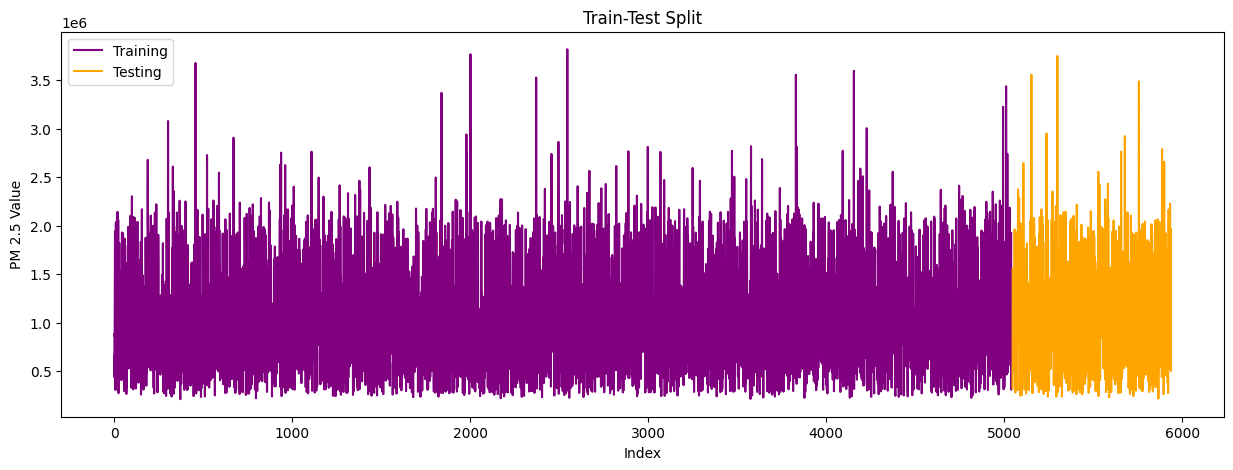

In [60]:
# fig = plt.figure(figsize=(15,5))
# plt.plot(X_train_lstm.shape, color='purple', label='Training')
# plt.plot(X_test_lstm.shape, color='orange', label='Testing')
# plt.xlabel('Date')
# plt.ylabel('PM 2.5 Value')
# plt.title('Train-Test Split')
# plt.legend()
# plt.show()

# Plot data training dan testing
fig = plt.figure(figsize=(15, 5))

# Plot data training
plt.plot(range(len(X_train)), y_train, color='purple', label='Training')

# Plot data testing (offset index setelah training)
plt.plot(range(len(X_train), len(X_train) + len(X_test)), y_test, color='orange', label='Testing')

plt.xlabel('Index')
plt.ylabel('PM 2.5 Value')
plt.title('Train-Test Split')
plt.legend()
plt.show()

# MODELING

In [61]:
# Definisikan model tanpa hyperparameter tuning
def build_best_model():
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2]))),
        Dropout(0.5),
        Bidirectional(LSTM(96)),
        Dense(192, activation='relu'),
        Dropout(0.1),
        Dense(1)  # Output layer
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss=Huber(),
        metrics=['mae']
    )
    return model

# Bangun model dengan hyperparameter terbaik
best_model = build_best_model()

# Melatih model
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.15, batch_size=32)

# Evaluasi pada data uji
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 1030698.5000 - mae: 1030698.9375 - val_loss: 994296.7500 - val_mae: 994297.3125
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 974024.4375 - mae: 974025.1250 - val_loss: 807802.6250 - val_mae: 807802.9375
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 744969.3750 - mae: 744969.8750 - val_loss: 581384.0000 - val_mae: 581384.5000
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 563122.0625 - mae: 563122.6250 - val_loss: 491404.2500 - val_mae: 491404.8438
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 486731.0938 - mae: 486731.5625 - val_loss: 465346.5312 - val_mae: 465347.0312
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 477275.6250 - mae: 477276.0938 - val_loss: 459884.5938 - val_mae: 459885.0312
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 473328.1562 - mae: 473328.7188 - val_loss: 425953.1875 - val_mae: 425953.7188
Epoch 8/100
135/135 ━━━━

In [62]:
best_model.save('best_model.h5')
print("Model telah disimpan sebagai 'best_model.h5'")

Model telah disimpan sebagai 'best_model.h5'


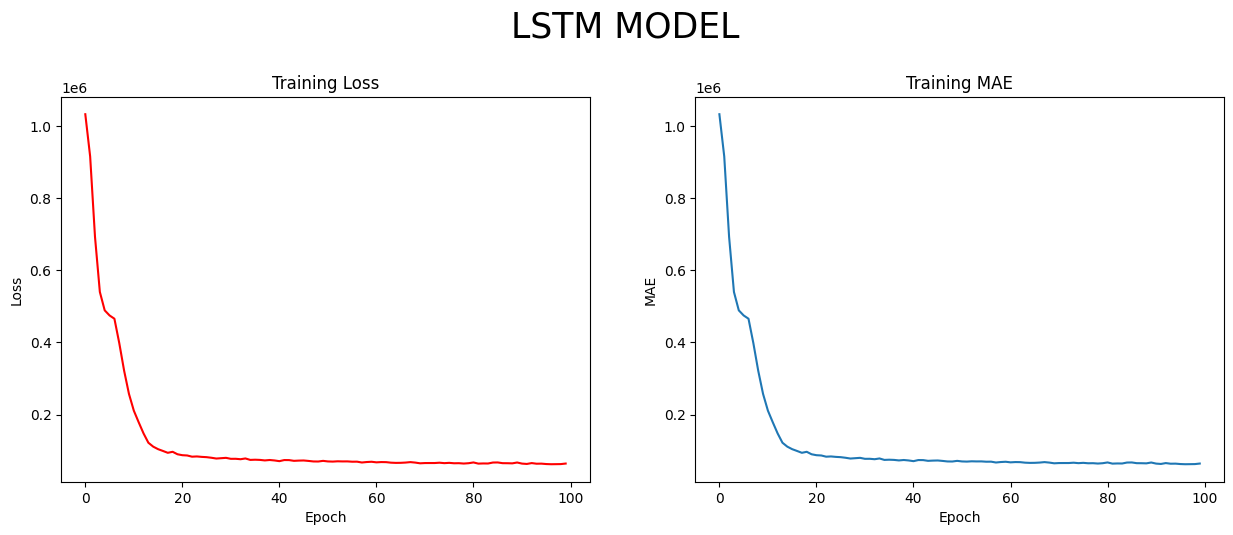

					FINAL LOSS: 64358.93 | FINAL MAE: 64359.43


In [63]:
plt.rcParams["figure.figsize"] = (15,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(history.history['mae'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training MAE')

fig.text(0.425,1, 'LSTM MODEL', {'size':25})
plt.show()

print("\t\t\t\t\tFINAL LOSS: {} | FINAL MAE: {}".format(
                                                round(history.history['loss'][-1], 2),
                                                 round(history.history['mae'][-1] ,2)))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


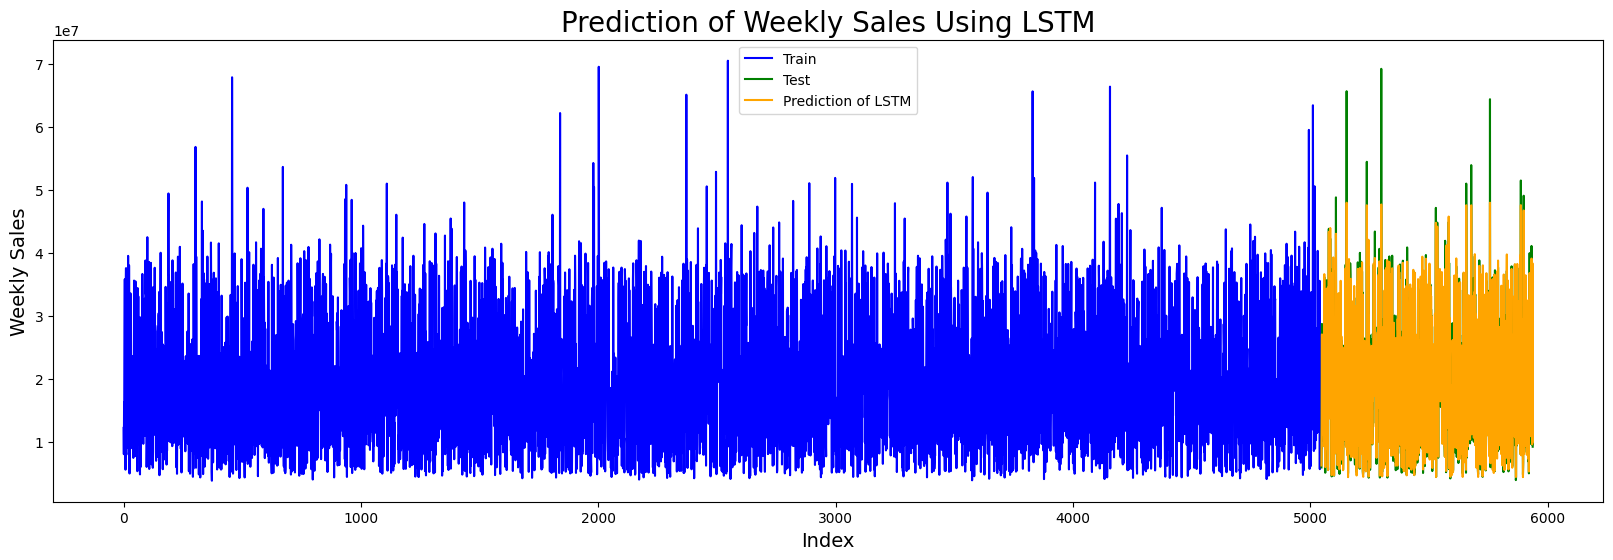

In [64]:
# Prediksi menggunakan model LSTM
y_pred = best_model.predict(X_test)
# y_pred = model.predict(X_test)

# Inverse scaling hanya pada target (kolom pertama)
y_pred_rescaled = y_pred * scaler_object.scale_[0] + scaler_object.mean_[0]
y_pred_rescaled = y_pred * scaler_object.scale_[0] + scaler_object.mean_[0]
y_test_rescaled = y_test * scaler_object.scale_[0] + scaler_object.mean_[0]

# Siapkan data untuk grafik
train_index = range(len(y_train))
test_index = range(len(y_train), len(y_train) + len(y_test))

# Inverse scaling untuk data training
y_train_rescaled = y_train * scaler_object.scale_[0] + scaler_object.mean_[0]
y_train_scaled = (y_train - scaler.mean_[0]) / scaler.scale_[0]

# Plot grafik
plt.figure(figsize=(20, 6))
plt.title('Prediction of Weekly Sales Using LSTM', fontsize=20)

# Plot data training
plt.plot(train_index, y_train_rescaled, label='Train', color='blue')

# Plot data testing
plt.plot(test_index, y_test_rescaled, label='Test', color='green')

# Plot prediksi
plt.plot(test_index, y_pred_rescaled, label='Prediction of LSTM', color='orange')

plt.legend(loc='best')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

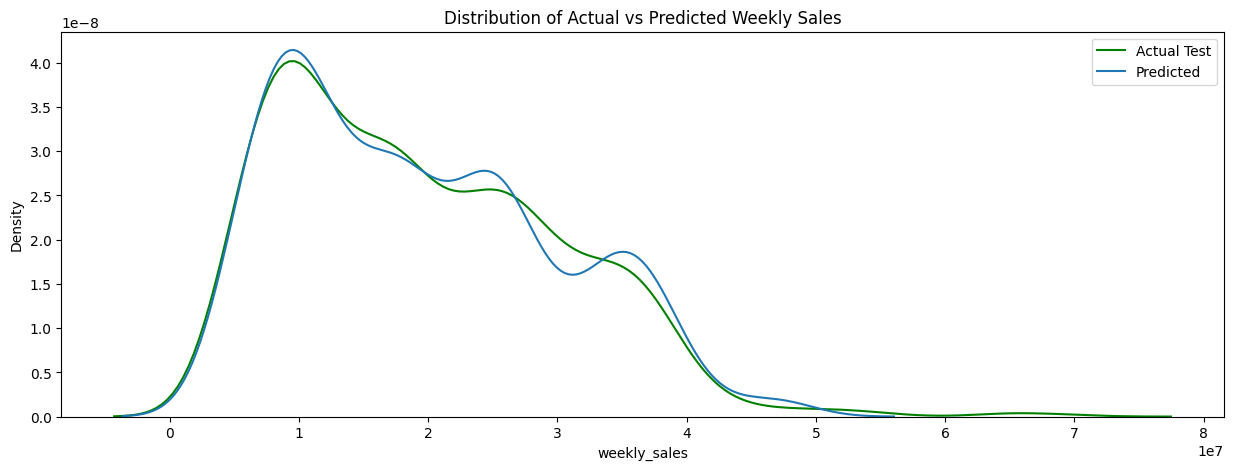

In [65]:
import seaborn as sns
sns.kdeplot(y_test_rescaled, label="Actual Test", color="green")
sns.kdeplot(y_pred_rescaled, label="Predicted", color="orange")
plt.legend()
plt.title("Distribution of Actual vs Predicted Weekly Sales")
plt.show()

# IMPLEMENTASI SHARP

In [66]:
print(best_model.summary())  # Periksa input dan output model
print(X_train.shape)  # Cek format data Anda

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 128)         │        46,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 192)            │       172,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 768,389 (2.93 MB)

 Trainable params: 256,129 (1000.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 512,260 (1.95 MB)

None
(5047, 1, 25)


In [67]:
import shap
shap.initjs()

In [68]:
# Jika data adalah DataFrame
print("Nama kolom data:")
print(data.columns)

print("Nama fitur yang digunakan:")
print(preprocessor)

Nama kolom data:
Index(['store', 'date', 'weekly_sales', 'is_holiday', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'season',
       'month', 'month_name', 'week', 'day_of_week'],
      dtype='object')
Nama fitur yang digunakan:
ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['temperature', 'fuel_price', 'cpi',
                                  'unemployment']),
                                ('cat_features', BinaryEncoder(),
                                 ['store', 'is_holiday', 'season', 'month_name',
                                  'week'])])


In [69]:
print("Jumlah nilai unik per fitur sebelum encoding:")
for col in ['store', 'is_holiday', 'season', 'month_name', 'week', 'temperature', 'fuel_price', 'cpi', 'unemployment']:
    print(f"{col}: {data[col].nunique()} nilai unik")

Jumlah nilai unik per fitur sebelum encoding:
store: 45 nilai unik
is_holiday: 2 nilai unik
season: 4 nilai unik
month_name: 12 nilai unik
week: 52 nilai unik
temperature: 3528 nilai unik
fuel_price: 892 nilai unik
cpi: 2145 nilai unik
unemployment: 349 nilai unik


In [70]:
feature_names = ['temperature', 'fuel_price', 'cpi', 'unemployment'
                 'store', 'is_holiday', 'season', 'month_name', 'week']
for i, feature in enumerate(feature_names):
    print(f"Feature {i}: {feature}")

Feature 0: temperature
Feature 1: fuel_price
Feature 2: cpi
Feature 3: unemploymentstore
Feature 4: is_holiday
Feature 5: season
Feature 6: month_name
Feature 7: week


In [71]:
# Pastikan data sudah di-flatten
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Periksa jumlah fitur
print("Shape X_test_flat:", X_test_flat.shape)

Shape X_test_flat: (891, 25)


In [72]:
import pandas as pd

# One-hot encoding untuk kolom kategorikal
encoded_df = pd.get_dummies(data, columns=['season', 'month_name', 'is_holiday'], drop_first=False)

# Tampilkan kolom hasil encoding
print("Kolom setelah encoding:", encoded_df.columns)

Kolom setelah encoding: Index(['store', 'date', 'weekly_sales', 'temperature', 'fuel_price', 'cpi',
       'unemployment', 'year', 'quarter', 'month', 'week', 'day_of_week',
       'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_name_April', 'month_name_August', 'month_name_December',
       'month_name_February', 'month_name_January', 'month_name_July',
       'month_name_June', 'month_name_March', 'month_name_May',
       'month_name_November', 'month_name_October', 'month_name_September',
       'is_holiday_0', 'is_holiday_1'],
      dtype='object')


In [73]:
# Ubah array menjadi DataFrame sementara
X_test_flat_df = pd.DataFrame(X_test_flat)

# Statistik deskriptif
print(X_test_flat_df.describe())

       0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  \
count 891 891 891 891 891 891 891 891 891 891  ... 891 891 891 891 891 891   
mean    0   0   0  -0   0   0   0   1   0   1  ...   0   0   1   0   0   0   
std     1   1   1   1   0   0   0   1   1   0  ...   0   0   0   0   0   0   
min    -3  -2  -1  -3   0   0   0   0   0   0  ...   0   0   0   0   0   0   
25%    -1  -1  -1  -1   0   0   0   0   0   0  ...   0   0   0   0   0   0   
50%     0   0   0   0   0   0   0   1   0   1  ...   0   0   1   0   0   0   
75%     1   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   
max     2   2   1   3   1   1   1   1   1   1  ...   1   1   1   1   1   1   

       21  22  23  24  
count 891 891 891 891  
mean    0   0   1   0  
std     1   0   0   1  
min     0   0   0   0  
25%     0   0   0   0  
50%     0   0   1   0  
75%     1   1   1   1  
max     1   1   1   1  

[8 rows x 25 columns]


In [74]:
print("Shape X_test_flat:", X_test_flat.shape)  # Jumlah kolom setelah flatten
print("Contoh data X_test_flat (5 baris pertama):")
print(X_test_flat[:5, :])  # Tampilkan beberapa baris pertama

Shape X_test_flat: (891, 25)
Contoh data X_test_flat (5 baris pertama):
[[-0.43657014  0.97001285 -1.1198062  -2.03365794  1.          0.
   0.          0.          1.          0.          0.          1.
   0.          1.          0.          0.          0.          1.
   1.          1.          0.          1.          1.          0.
   0.        ]
 [ 1.2711608   0.65750718  1.21150652 -0.94209095  0.          1.
   1.          0.          1.          0.          0.          1.
   1.          0.          0.          1.          0.          0.
   0.          0.          1.          0.          0.          1.
   0.        ]
 [ 0.8642744   0.67499002 -0.93801717  0.37621103  0.          0.
   0.          1.          0.          1.          0.          1.
   1.          0.          0.          1.          0.          1.
   1.          0.          1.          1.          0.          1.
   1.        ]
 [-2.13617419  0.13739284 -1.06759198  0.03448902  0.          0.
   0.          0.        

In [75]:
# feature_names = [
#     'temperature', 'fuel_price', 'cpi', 'unemployment',
#     'store', 'not_holidays', 'holidays',  # holiday encoding
#     'year','winter', 'spring', 'summer', 'autumn',  # season encoding
#     'february', 'march', 'april', 'may', 'june', 'july', 'august',
#     'september', 'october', 'november', 'december', 'january',  # month_name encoding
#     'week' 
# ]

feature_names = [
    'store', 'date', 'temperature', 'fuel_price', 'cpi',
       'unemployment','week', 
       'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_name_April', 'month_name_August', 'month_name_December',
       'month_name_February', 'month_name_January', 'month_name_July',
       'month_name_June', 'month_name_March', 'month_name_May',
       'month_name_November', 'month_name_October', 'month_name_September',
       'is_holiday_0', 'is_holiday_1'
]

print("Jumlah kolom X_test_flat:", X_test_flat.shape[1])
print("Jumlah fitur:", len(feature_names))

Jumlah kolom X_test_flat: 25
Jumlah fitur: 25


In [76]:
for i, feature in enumerate(feature_names):
    print(f"Feature {i}: {feature}")

Feature 0: store
Feature 1: date
Feature 2: temperature
Feature 3: fuel_price
Feature 4: cpi
Feature 5: unemployment
Feature 6: week
Feature 7: season_Autumn
Feature 8: season_Spring
Feature 9: season_Summer
Feature 10: season_Winter
Feature 11: month_name_April
Feature 12: month_name_August
Feature 13: month_name_December
Feature 14: month_name_February
Feature 15: month_name_January
Feature 16: month_name_July
Feature 17: month_name_June
Feature 18: month_name_March
Feature 19: month_name_May
Feature 20: month_name_November
Feature 21: month_name_October
Feature 22: month_name_September
Feature 23: is_holiday_0
Feature 24: is_holiday_1


In [77]:
def model_predict(data):
    # Ubah data ke bentuk 3D (otomatis hitung timesteps jika tidak cocok)
    data_reshaped = data.reshape(data.shape[0], -1, 5)
    return best_model.predict(data_reshaped)

# Contoh subset
X_train_subset = X_train[:4]
X_test_subset = X_test[:5]

# Pastikan dimensi sesuai sebelum prediksi
print(X_test_subset.shape)

# Prediksi
y_pred = model_predict(X_test_subset)
print(y_pred[:3])  # Lihat hasil prediksi awal

(5, 1, 25)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
[[1084338.1 ]
 [1072727.5 ]
 [1045629.94]]


In [78]:
def model_predict(data):
    # Debugging awal
    print("Original shape:", data.shape)

    timesteps = 1  # Tentukan sesuai model Anda
    features = 25    # Tentukan sesuai model Anda

    # Periksa apakah data memiliki ukuran yang valid untuk reshaping
    total_elements = data.size
    samples = total_elements // (timesteps * features)

    if samples * timesteps * features != total_elements:
        raise ValueError(f"Data size {total_elements} tidak cocok dengan dimensi yang diharapkan "
                         f"({samples}, {timesteps}, {features}).")
    
    # Debugging sebelum reshaping
    print("Expected samples:", samples)

    # Ubah bentuk data
    data_reshaped = data.reshape(samples, timesteps, features)
    return best_model.predict(data_reshaped)

Original shape: (50, 25)
Expected samples: 50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Original shape: (104900, 25)
Expected samples: 104900
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Original shape: (104800, 25)
Expected samples: 104800
3275/3275 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original shape: (104800, 25)
Expected samples: 104800
3275/3275 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original shape: (104800, 25)
Expected samples: 104800
3275/3275 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original shape: (104800, 25)
Expected samples: 104800
3275/3275 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original shape: (104900

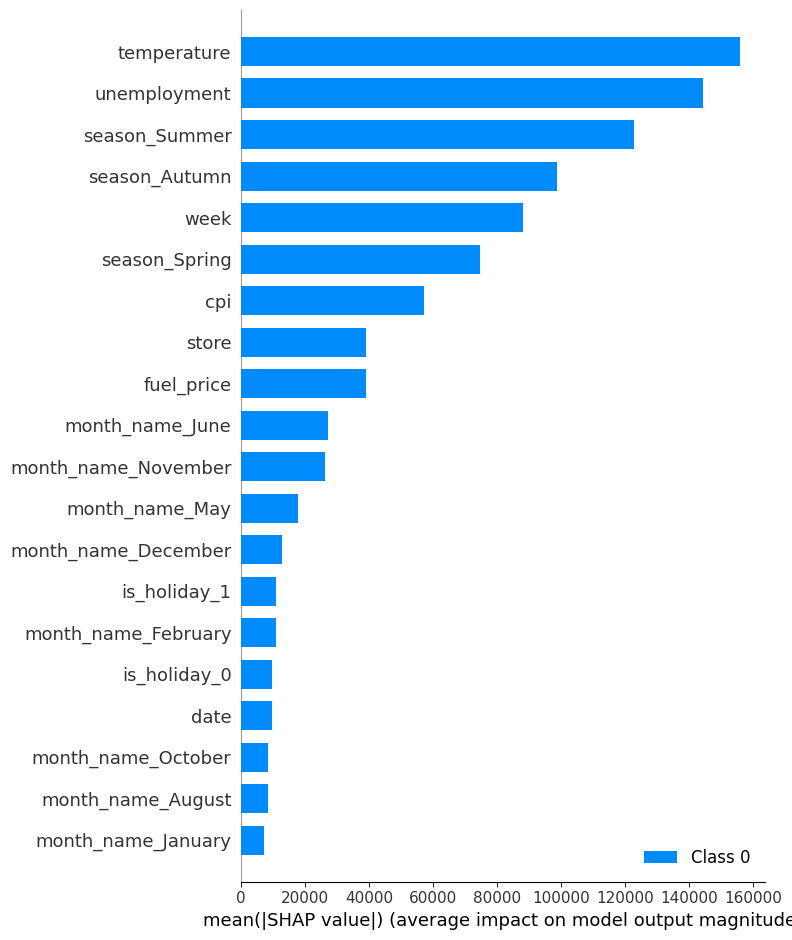

In [79]:
if X_test_flat.shape[1] != len(feature_names):
    feature_names = [f"feature_{i}" for i in range(X_test_flat.shape[1])]

# 1. KernelExplainer
explainer = shap.KernelExplainer(model_predict, X_train_flat[:50])

# 2. SHAP Values
shap_values = explainer.shap_values(X_test_flat[:10])

# 3. Visualisasi
shap.summary_plot(shap_values, X_test_flat[:10], feature_names=feature_names)

In [80]:
print("Shape X_test_subset:", X_test_subset.shape)
print("Total elemen X_test_subset:", X_test_subset.size)

Shape X_test_subset: (5, 1, 25)
Total elemen X_test_subset: 125


Original shape: (50, 25)
Expected samples: 50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Original shape: (104900, 25)
Expected samples: 104900
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original shape: (104800, 25)
Expected samples: 104800
3275/3275 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original shape: (104800, 25)
Expected samples: 104800
3275/3275 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Original shape: (104800, 25)
Expected samples: 104800
3275/3275 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original shape: (104800, 25)
Expected samples: 104800
3275/3275 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Original shape: (1, 25)
Expected samples: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Original shape: (104900

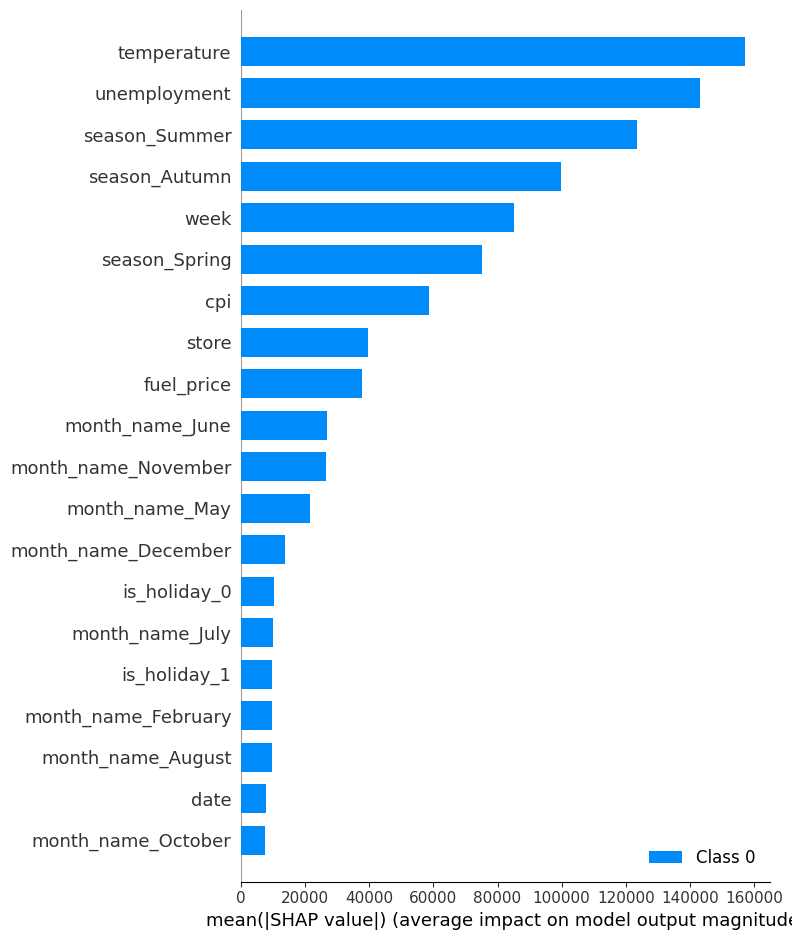

In [81]:
if X_test_flat.shape[1] != len(feature_names):
    feature_names = [f"feature_{i}" for i in range(X_test_flat.shape[1])]

# 1. KernelExplainer
explainer = shap.KernelExplainer(model_predict, X_train_flat[:50])

# 2. SHAP Values
shap_values = explainer.shap_values(X_test_flat[:10])

# 3. Visualisasi
shap.summary_plot(shap_values, X_test_flat[:10], feature_names=feature_names)

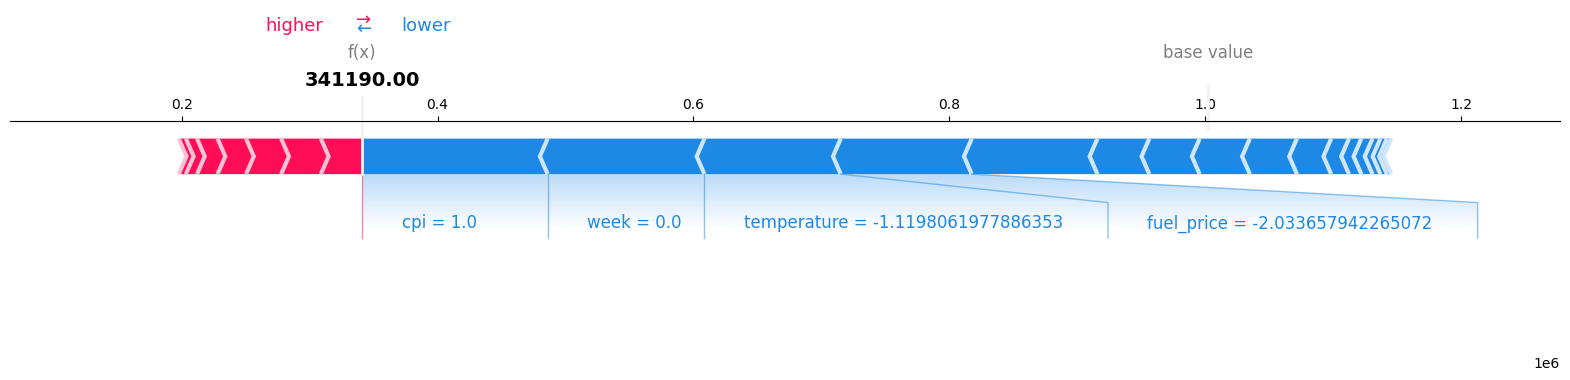

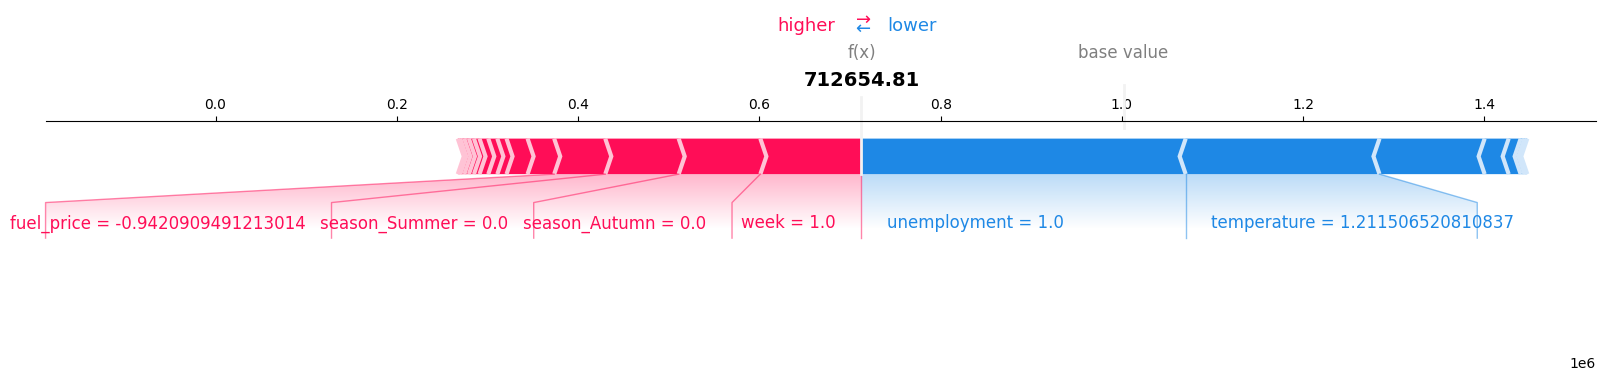

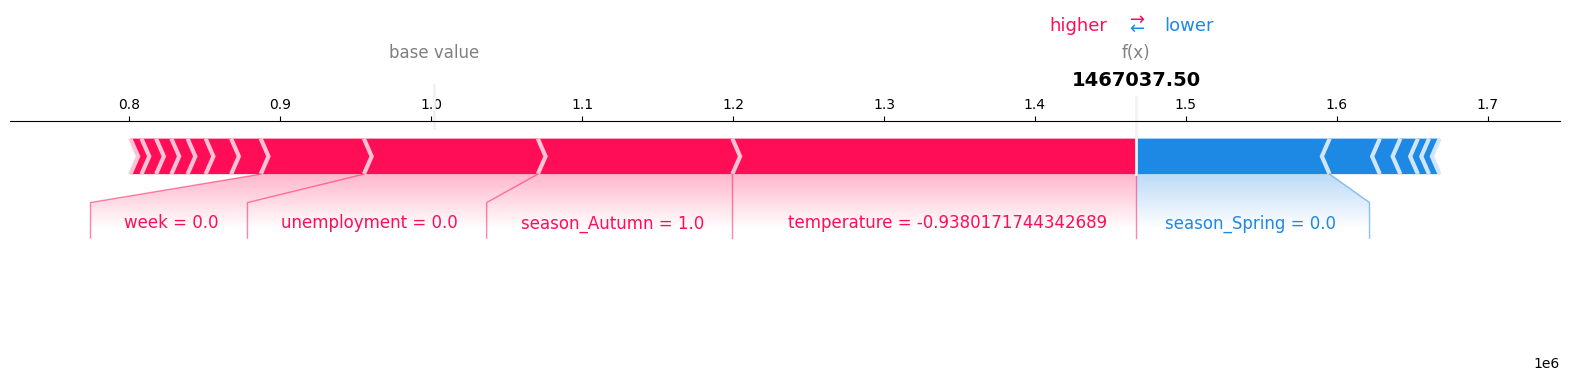

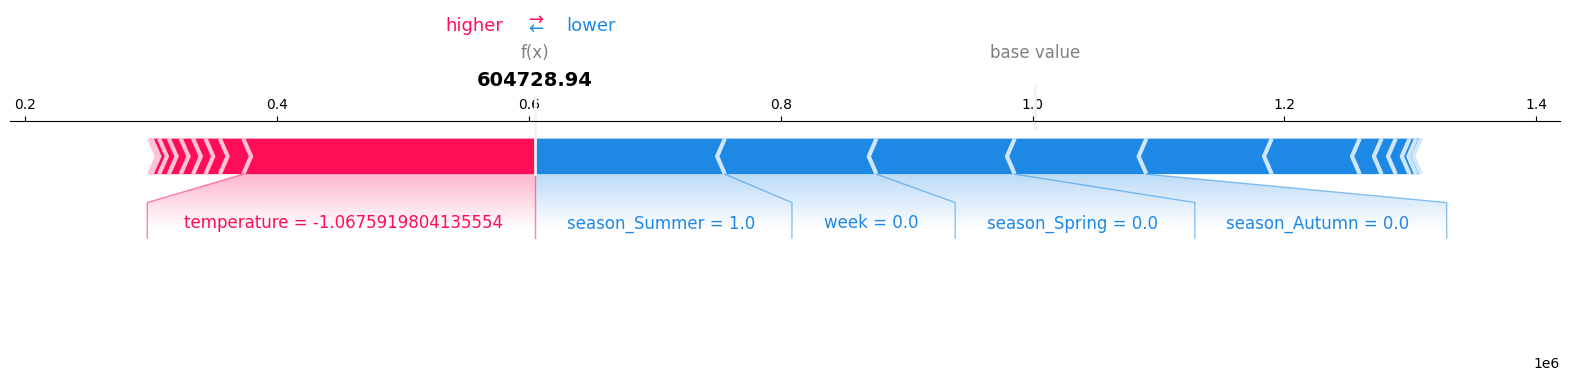

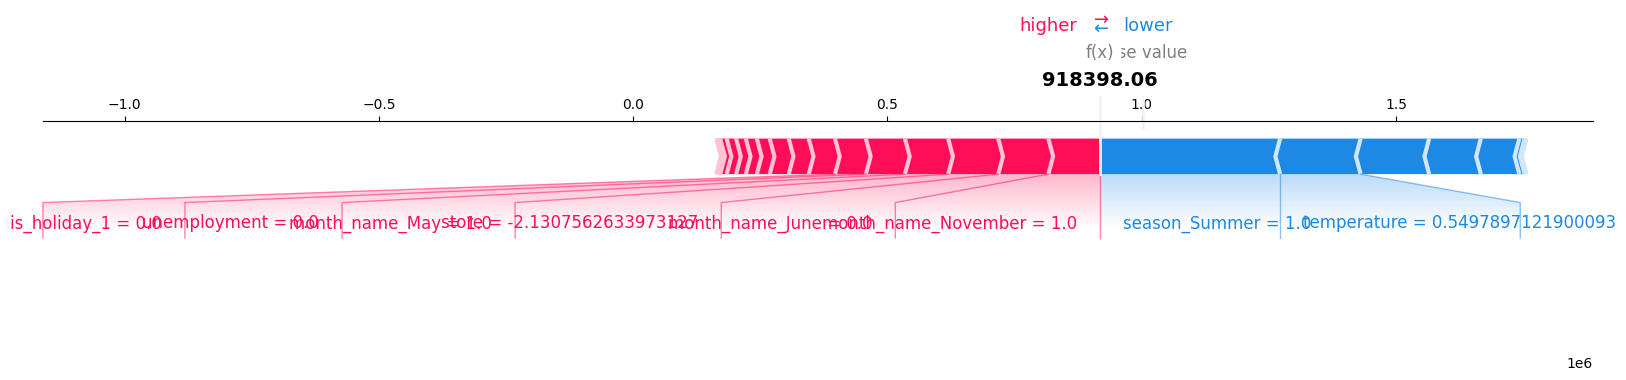

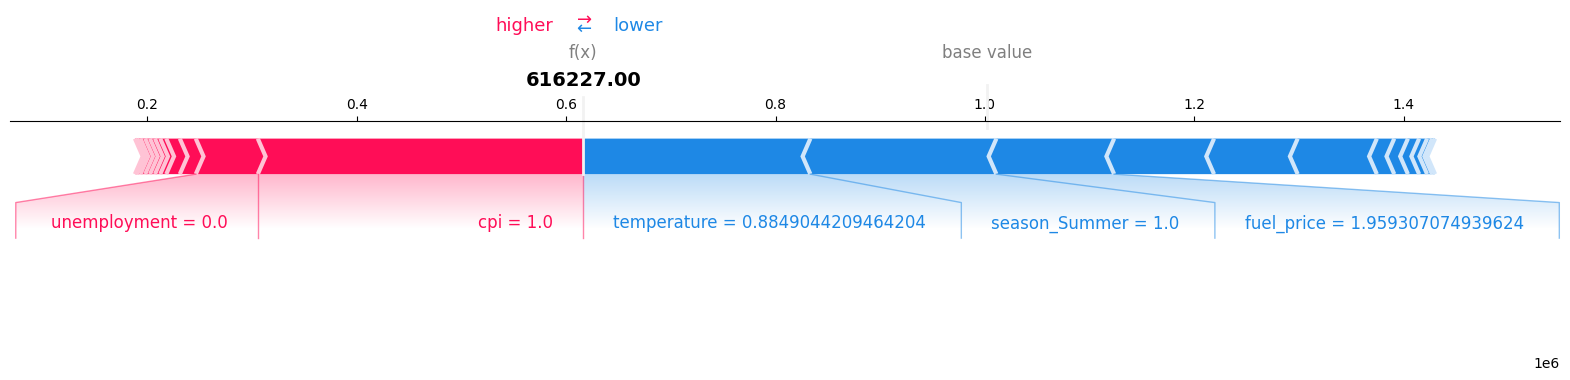

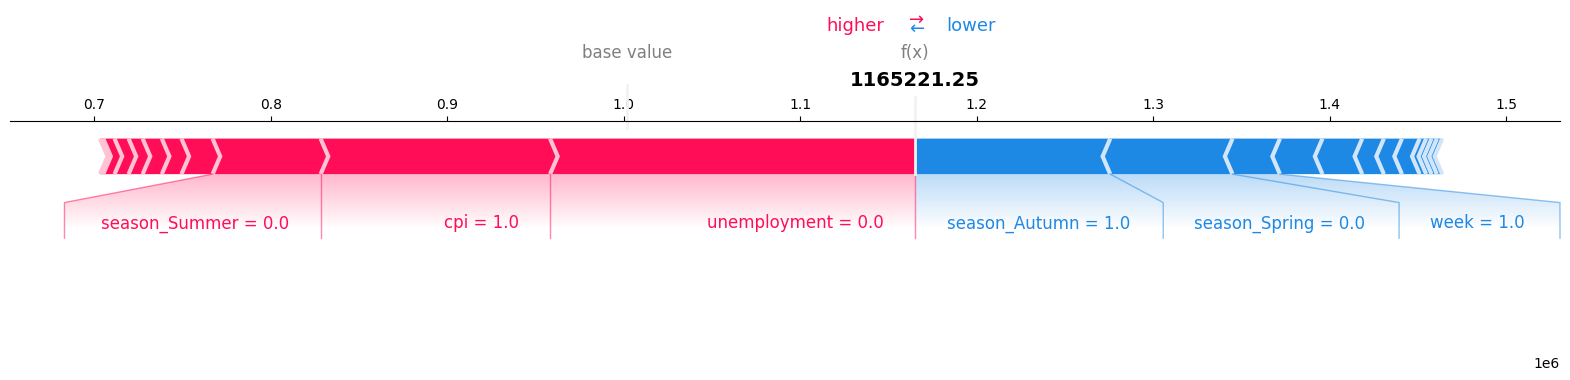

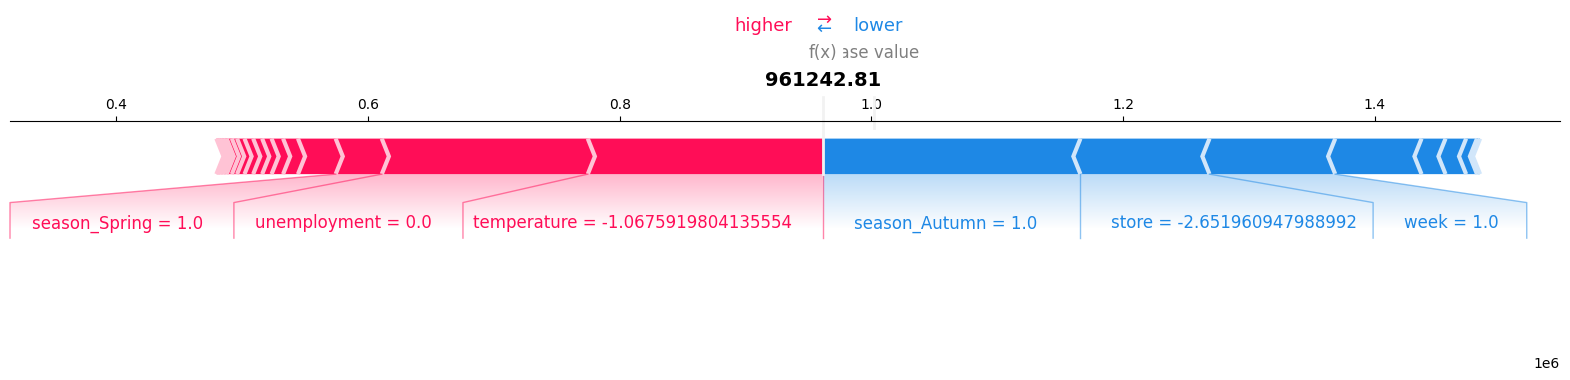

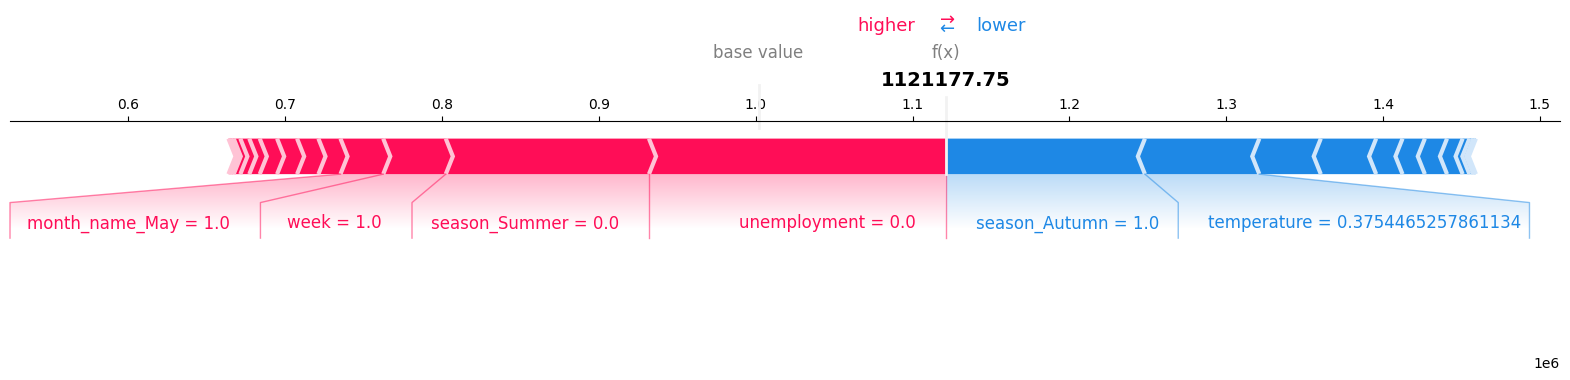

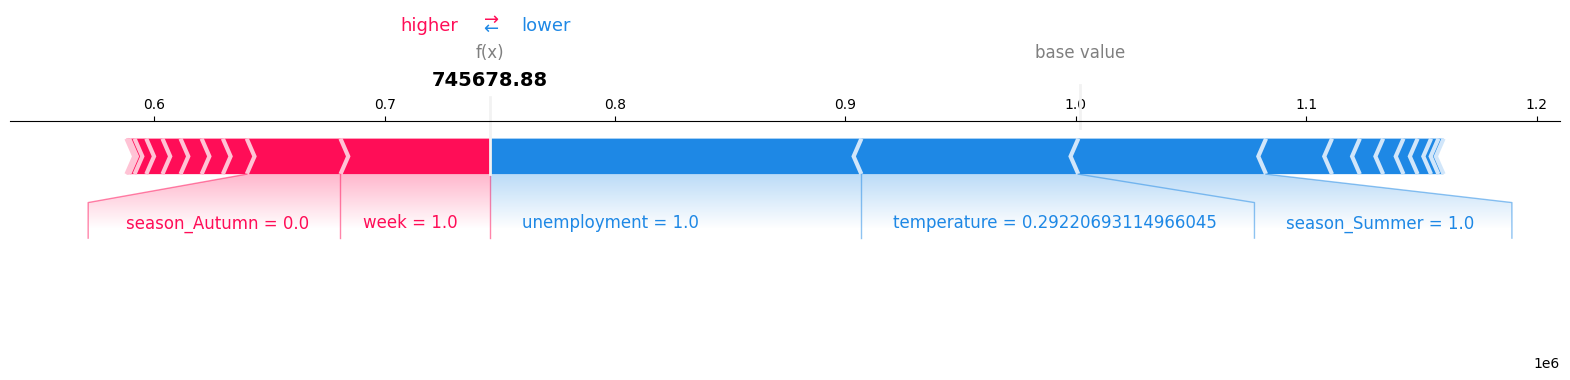

In [82]:
for i in range(len(shap_values[0])):
    shap.force_plot(
        explainer.expected_value[0],  # Nilai dasar model
        shap_values[0][i],           # SHAP values untuk sampel i
        X_test_flat[i],              # Data input untuk sampel i
        feature_names=feature_names, # Nama fitur
        matplotlib=True              # Gunakan matplotlib untuk output statis
    )

In [83]:
print("Train min:", y_train.min(), "max:", y_train.max())
print("Test min:", y_test.min(), "max:", y_test.max())

Train min: 209986.25 max: 3818686.45
Test min: 215359.21 max: 3749057.69


In [84]:
print("Statistics of Predictions:")
print("Predictions (rescaled):", y_pred_rescaled.min(), "-", y_pred_rescaled.max())
print("Test Data (rescaled):", y_test_rescaled.min(), "-", y_test_rescaled.max())

Statistics of Predictions:
Predictions (rescaled): 4442404.0 - 47964430.0
Test Data (rescaled): 3974996.762632167 - 69197318.01676978


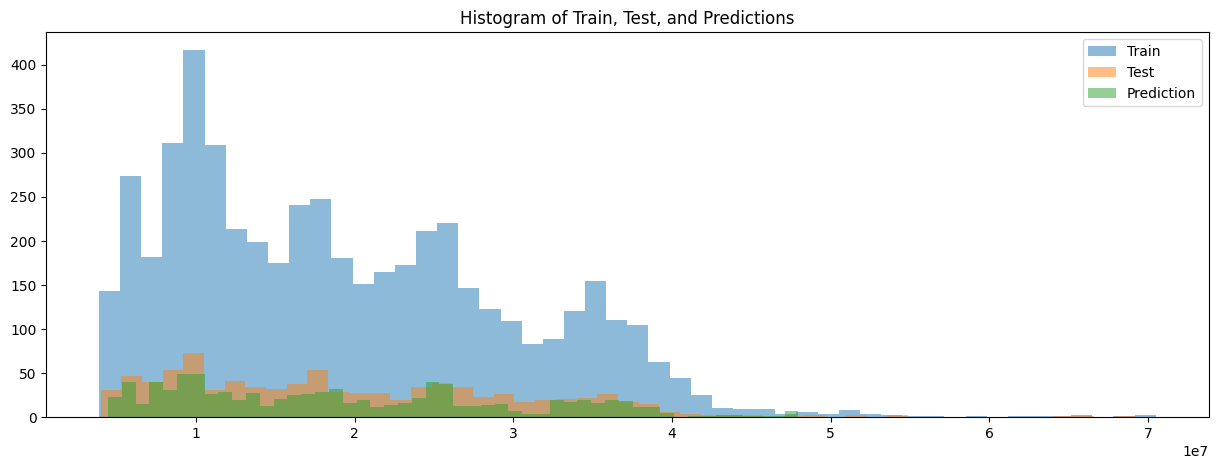

In [85]:
plt.hist(y_train_rescaled, bins=50, alpha=0.5, label="Train")
plt.hist(y_test_rescaled, bins=50, alpha=0.5, label="Test")
plt.hist(y_pred_rescaled, bins=50, alpha=0.5, label="Prediction")
plt.legend()
plt.title("Histogram of Train, Test, and Predictions")
plt.show()